# Call classes

In [1]:
from data_mining import integration, selection, visualization

# Integration Process
#### This part contains the integration process by calling the integration class (note should only be called once, but if accidentally run, we built an error handler.)

In [2]:
x = integration('valorant_games.csv')
x.create_table_load_data('valorant.db')

UNIQUE constraint failed: players.player_id
Failed to integrate data to database.


# Selection Processes
#### This part contains all the call from the database using a class

In [3]:
# call class for the database
x = selection("valorant.db")
# print schema
x.schema()

CREATE TABLE IF NOT EXISTS players(
    player_id INTEGER NOT NULL PRIMARY KEY,
    p_name TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS teams(
    team_id INTEGER NOT NULL PRIMARY KEY,
    t_name TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS agents(
    agent_id INTEGER NOT NULL PRIMARY KEY,
    agent TEXT NOT NULL
);

CREATE TABLE IF NOT EXISTS matches(
    match_id INTEGER NOT NULL PRIMARY KEY,
    match_datetime TEXT NOT NULL,
    match_map TEXT NOT NULL,
    team_id1 INTEGER NOT NULL,
    team_id2 INTEGER NOT NULL,
    team1_score INTEGER NOT NULL,
    team2_score INTEGER NOT NULL,
    game_patch FLOAT NOT NULL,
    FOREIGN KEY(team_id1) REFERENCES teams(team_id),
    FOREIGN KEY(team_id2) REFERENCES teams(team_id)
);

CREATE TABLE IF NOT EXISTS player_match_stats(
    rating FLOAT NOT NULL,
    rating_attackers FLOAT NOT NULL,
    rating_defenders FLOAT NOT NULL,
    average_combat_score INTEGER NOT NULL,
    average_combat_score_t INTEGER NOT NULL,
    average_combat_score_ct INTE

In [4]:

data = x.get_data("""
SELECT SUM(player_match_stats.kills) AS total_kills, players.p_name
FROM player_match_stats
JOIN players
ON player_match_stats.player_id = players.player_id 
GROUP BY players.p_name
ORDER BY total_kills DESC 
LIMIT 10;
""")

In [5]:
data.head()

,total_kills,p_name
0,7966,rawfiul
1,5774,Antidote
2,5728,ScrewFace
3,5650,Excali
4,5562,koalanoob


In [6]:
hs_percentage = x.get_data("""
                           SELECT AVG(player_match_stats.headshot) * 100 AS total_hs, players.p_name
                           FROM player_match_stats
                            JOIN players
                            ON player_match_stats.player_id = players.player_id
                            JOIN teams
                            ON player_match_stats.team_id = teams.team_id
                            WHERE teams.t_name = "T1"
                            GROUP BY players.p_name
                            ORDER BY total_hs DESC
                            """)

In [7]:
hs_percentage.head(30)

,total_hs,p_name
0,34.250000,brax
1,27.370370,pwny
2,25.361111,curry
3,24.583333,dynamic
4,24.500000,Sayaplayer
5,24.000000,ban
6,23.857143,thwifo
7,23.000000,iNTRO
8,23.000000,Carpe
9,22.607143,steel


In [8]:
brax = x.get_data("""
    SELECT teams.t_name, COUNT(*) as team_count
    FROM players
    JOIN player_match_stats ON players.player_id = player_match_stats.player_id
    JOIN teams ON player_match_stats.team_id = teams.team_id
    WHERE TRIM(players.p_name) = 'brax'
    GROUP BY teams.t_name;
""")

In [9]:
brax.head(30)

,t_name,team_count
0,Invincible Gaming,56
1,T1,16
2,Team Brax,8
3,Team Starlight,10
4,The Nation,18
5,iwnl,14


In [10]:
g2_winslosses = x.get_data("""
            SELECT 
                SUM(CASE WHEN teams.t_name = 'G2 Esports' AND matches.team1_score > matches.team2_score THEN 1 ELSE 0 END) AS wins,
                SUM(CASE WHEN teams.t_name = 'G2 Esports' AND matches.team1_score < matches.team2_score THEN 1 ELSE 0 END) AS losses
            FROM matches
            JOIN teams ON matches.team_id1 = teams.team_id OR matches.team_id2 = teams.team_id;
                    """)

In [11]:
g2_winslosses.head(30)

,wins,losses
0,176,146


In [12]:
top_10_teams_with_most_kills = x.get_data("""
                    SELECT teams.t_name AS team_name, SUM(player_match_stats.kills) AS total_kills
                    FROM players
                    JOIN player_match_stats ON players.player_id = player_match_stats.player_id
                    JOIN teams ON player_match_stats.team_id = teams.team_id
                    GROUP BY teams.t_name
                    ORDER BY total_kills DESC
                    LIMIT 10;
                    """)

In [13]:
top_10_teams_with_most_kills.head(30)

,team_name,total_kills
0,Enigma Gaming,33572
1,Soniqs,23114
2,YFP Gaming,22582
3,Cosmic Divide,21830
4,Fire Flux Esports,20818
5,Global Esports,20698
6,Ghost Gaming,20266
7,BASILISK,20090
8,VIRTUOSO,18824
9,FNATIC,18782


In [14]:
top_10_teams_who_play_jet = x.get_data("""
                    SELECT teams.t_name AS team_name, COUNT(*) AS jett_usage_count
                    FROM players
                    JOIN player_match_stats ON players.player_id = player_match_stats.player_id
                    JOIN teams ON player_match_stats.team_id = teams.team_id
                    JOIN agents ON player_match_stats.agent_id = agents.agent_id
                    WHERE agents.agent = 'Jett'
                    GROUP BY teams.t_name
                    ORDER BY jett_usage_count DESC
                    LIMIT 10;
                    """)

In [15]:
top_10_teams_who_play_jet.head(30)

,team_name,jett_usage_count
0,Enigma Gaming,378
1,Cosmic Divide,226
2,YFP Gaming,192
3,FULL SENSE,184
4,Team Reckaroo,180
5,Renegades,170
6,Teal Seam,168
7,SoaR,168
8,Ghost Gaming,168
9,BASILISK,162


In [16]:
top_10_players_with_most_deaths = x.get_data("""
                    SELECT players.p_name AS player_name, SUM(player_match_stats.death) AS total_deaths
                    FROM players
                    JOIN player_match_stats ON players.player_id = player_match_stats.player_id
                    GROUP BY players.p_name
                    ORDER BY total_deaths DESC
                    LIMIT 10;
                    """)

In [17]:
top_10_players_with_most_deaths.head(30)

,player_name,total_deaths
0,rawfiul,6314
1,ChurmZ,6184
2,Antidote,5582
3,RvK,5366
4,nerve,5352
5,riku,5334
6,Andersin,5290
7,Crunchy,5266
8,Add3r,5206
9,Lin,5114


In [18]:
maps_frequency = x.get_data("""
                    SELECT match_map AS Map_name, COUNT(*) AS Frequency
                    FROM matches
                    GROUP BY match_map
                    ORDER BY Frequency DESC;
                    """)

In [19]:
maps_frequency.head(30)

,Map_name,Frequency
0,Ascent,10206
1,Haven,9808
2,Icebox,8168
3,Bind,6317
4,Split,4747
5,Breeze,4471
6,Fracture,3060
7,Pearl,1934
8,Lotus,638


In [20]:
acs_scatter = x.get_data("""
    SELECT kills, death, assist, rating, average_combat_score FROM player_match_stats
""")

acs_scatter.head()

,kills,death,rating,average_combat_score
0,11,13,1.13,195
1,11,13,1.13,195
2,14,13,0.93,194
3,14,13,0.93,194
4,14,18,0.81,204


In [21]:
top_10_used_agents = x.get_data("""
    SELECT agents.agent AS agent_name, COUNT(*) AS agent_usage_count
    FROM agents
    JOIN player_match_stats ON agents.agent_id = player_match_stats.agent_id
    GROUP BY agents.agent
    ORDER BY agent_usage_count DESC
    LIMIT 10
""")

top_10_used_agents

,agent_name,agent_usage_count
0,Jett,35482
1,Sova,34738
2,Killjoy,22242
3,Viper,22186
4,Astra,20984
5,Raze,17585
6,Skye,15951
7,Sage,15663
8,Chamber,14657
9,Omen,14476


# Visualization or Knowledge Presentation
#### This part contains all the visualization or presentation of pattern seen in the data

In [22]:
vis = visualization()

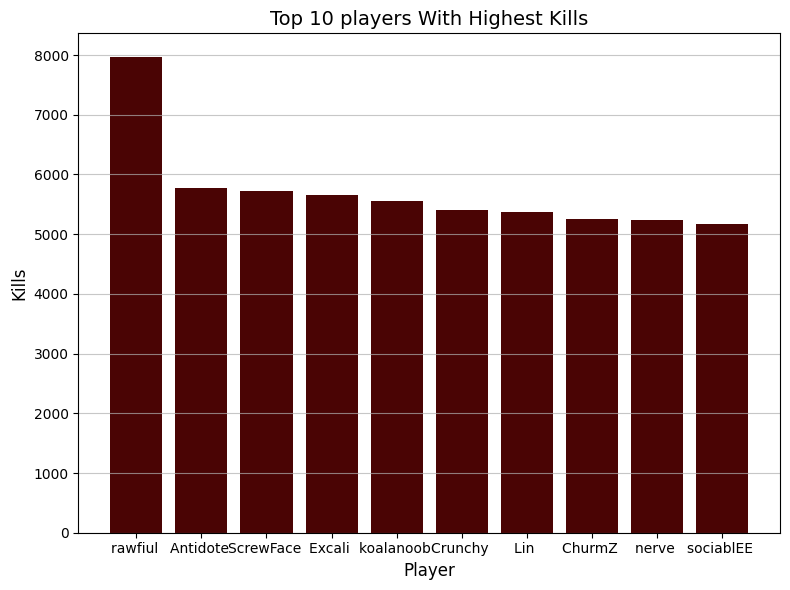

In [23]:
vis.top(df=data, dfx='p_name', dfy='total_kills', x_name='Player', y_name='Kills', title="Top 10 players With Highest Kills", color="#4A0404")

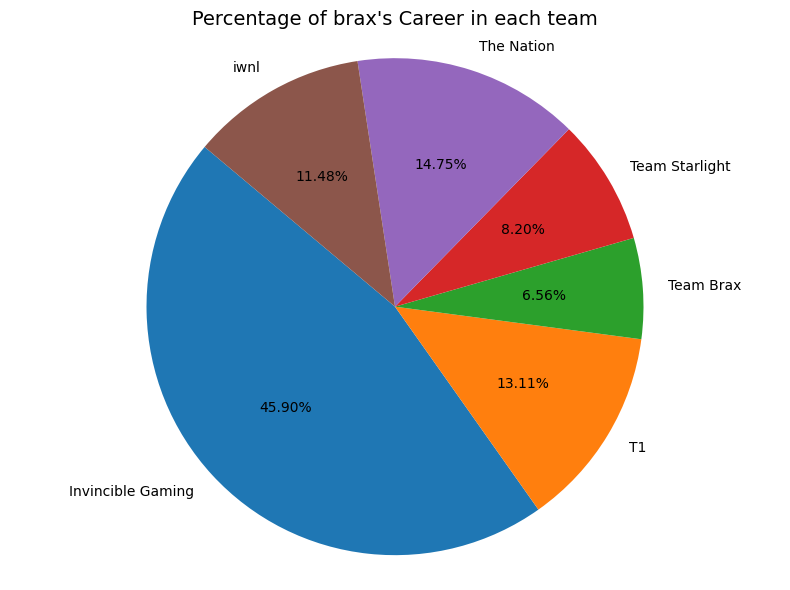

In [24]:
vis.pie(df=brax, dfx='t_name', dfy='team_count', title="Percentage of brax's Career in each team")

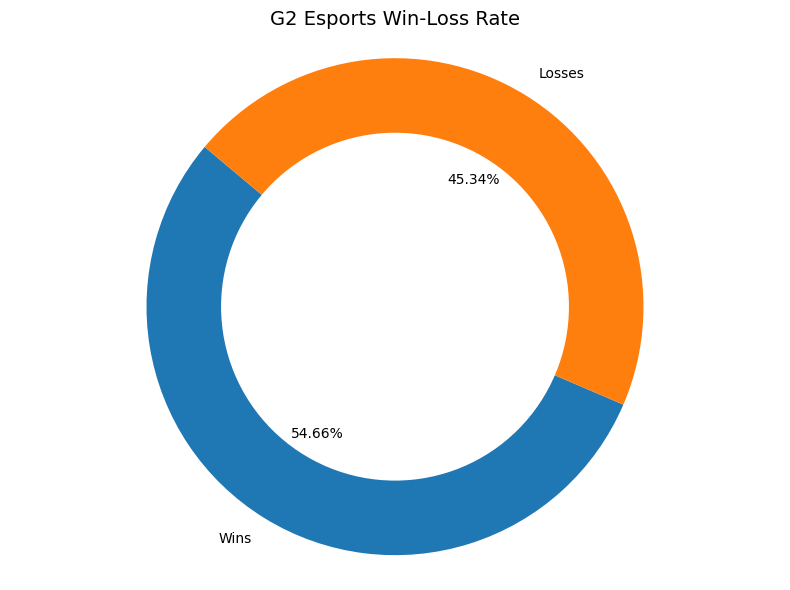

In [25]:
vis.donut(df=g2_winslosses, dfx='wins', dfy='losses', title='G2 Esports Win-Loss Rate')


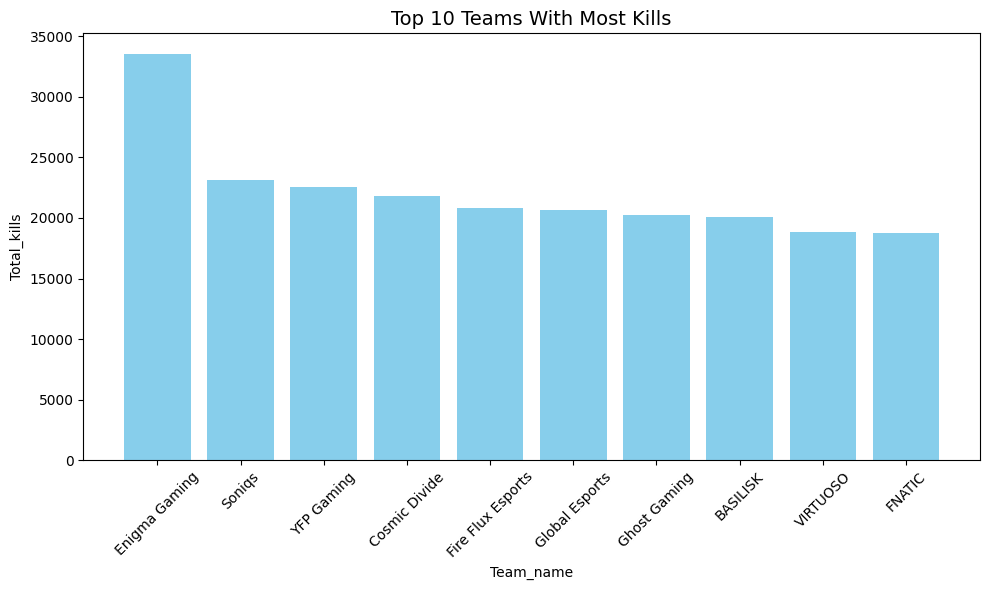

In [26]:
vis.bar_graph(df=top_10_teams_with_most_kills, dfx='team_name', dfy='total_kills', title='Top 10 Teams With Most Kills')

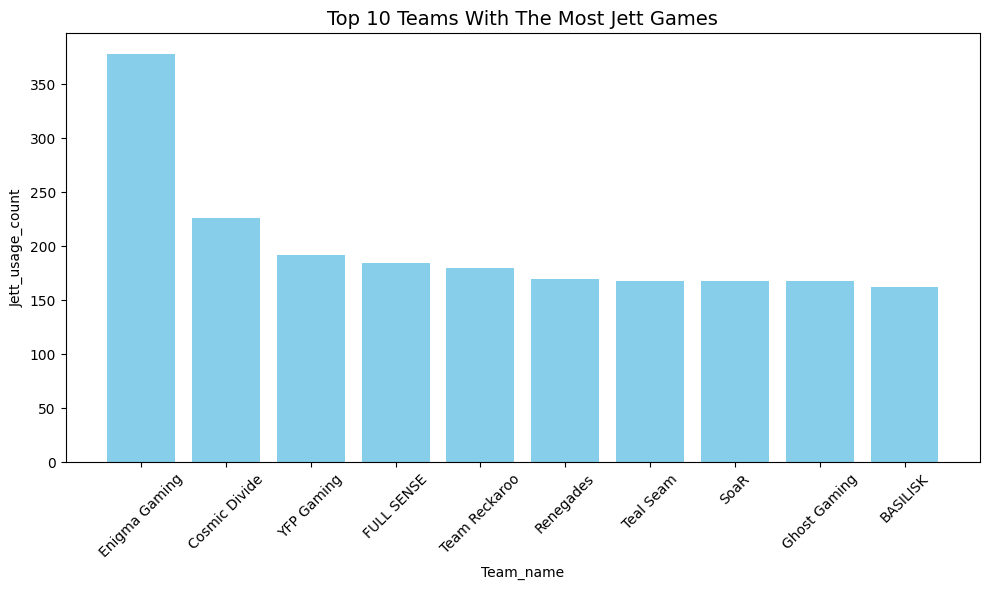

In [27]:
vis.bar_graph(df=top_10_teams_who_play_jet, dfx='team_name', dfy='jett_usage_count', title="Top 10 Teams With The Most Jett Games")

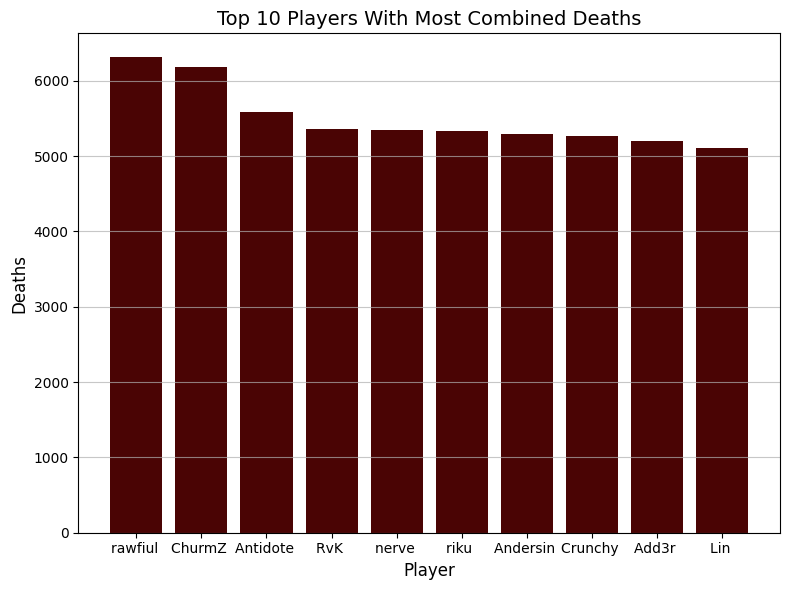

In [28]:
vis.top(df=top_10_players_with_most_deaths, dfx='player_name', dfy='total_deaths', x_name='Player', y_name='Deaths', title="Top 10 Players With Most Combined Deaths", color="#4A0404")

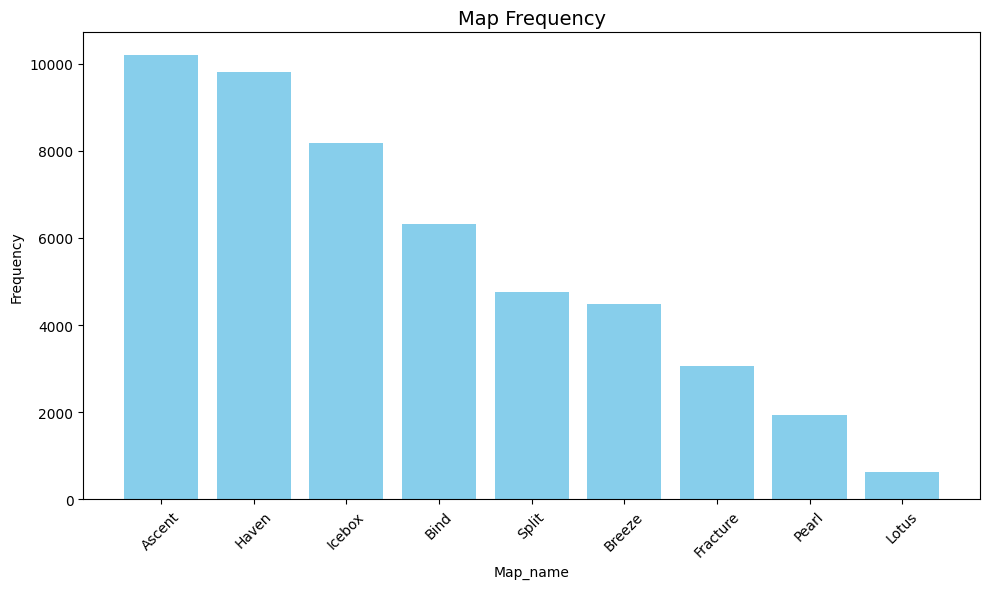

In [29]:
vis.bar_graph(df=maps_frequency, dfx='Map_name', dfy='Frequency', title="Map Frequency")

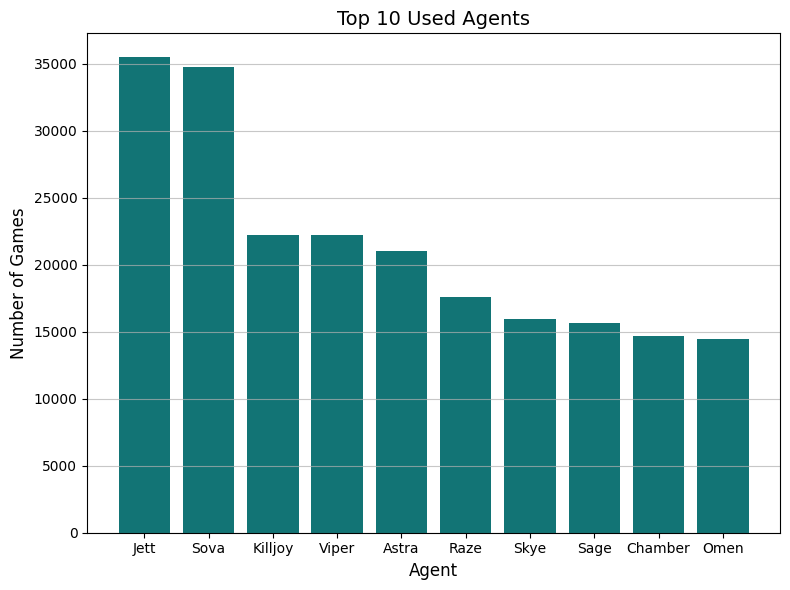

In [30]:
vis.top(df=top_10_used_agents, dfx='agent_name', dfy='agent_usage_count', x_name='Agent', y_name='Number of Games', title="Top 10 Used Agents", color="#127475")

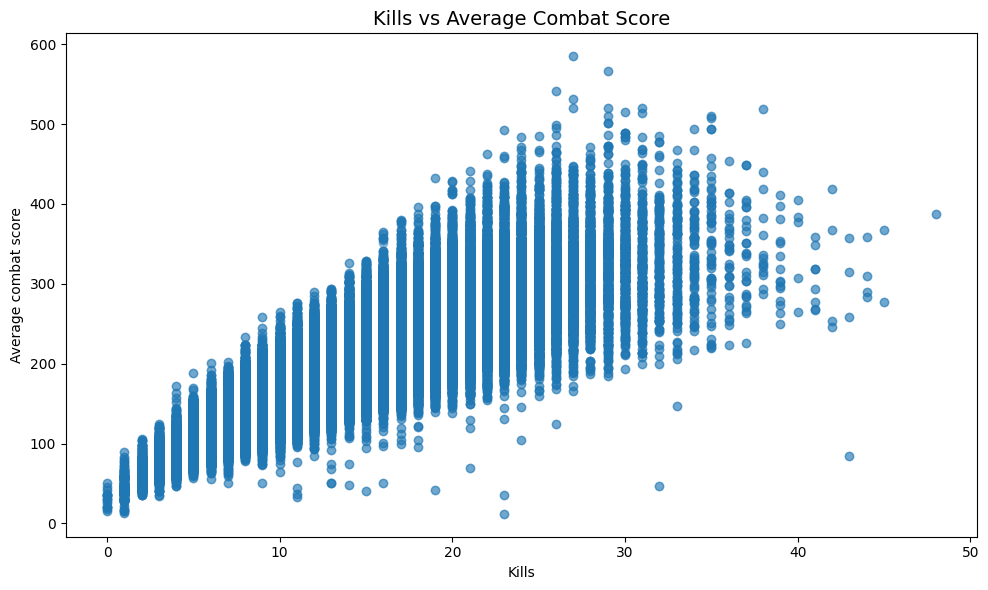

In [31]:
vis.scatter_plot(df=acs_scatter, dfx='kills', dfy="average_combat_score", title="Kills vs Average Combat Score", x_name="Kills", y_name="Average Combat Score")

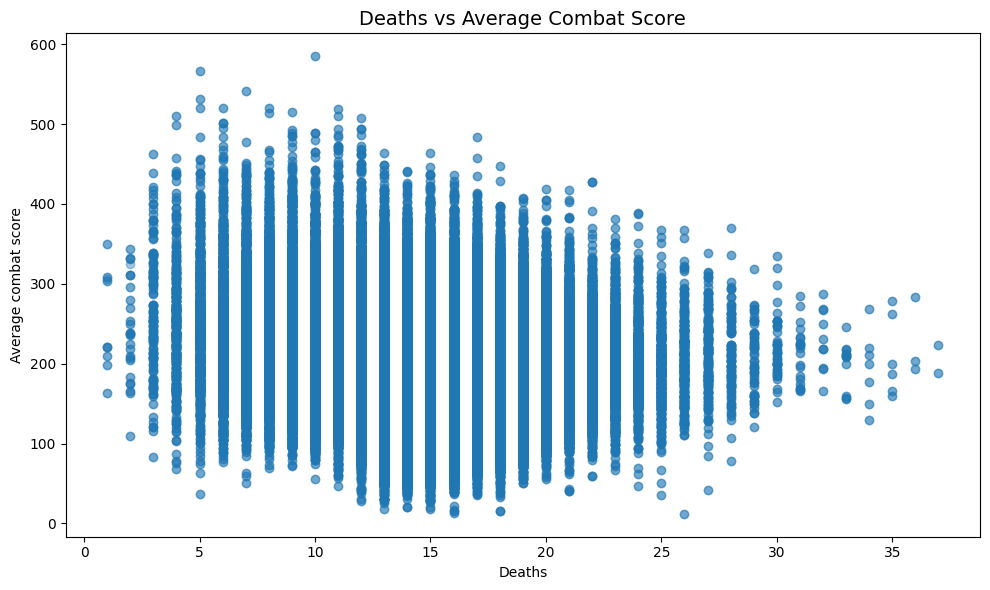

In [32]:
vis.scatter_plot(df=acs_scatter, dfx='death', dfy="average_combat_score", title="Deaths vs Average Combat Score", x_name="Deaths", y_name="Average Combat Score")

In [33]:
vis.scatter_plot(df=acs_scatter, dfx='assist', dfy='average_combat_score', x_name="Assists", y_name="Average Combat Score", title="Assists vs Average Combat")

KeyError: 'assist'

<Figure size 1000x600 with 0 Axes>

In [ ]:
vis.scatter_plot(df=acs_scatter, dfx='rating', dfy='average_combat_score', title="Rating vs Average Combat Score", x_name="Rating", y_name="Average Combat Score")

# Data Mining Algos

In [ ]:
data = x.get_data("""
SELECT 
    kills,
    death,
    assist,
    average_combat_score
FROM 
    player_match_stats;
                  """)

In [ ]:
X = data[['kills', 'death', 'assist']]
y = data['average_combat_score']
vis.three_variable_knn(X, y)
vis.two_variable_knn(X[['kills', 'death']], y)
